# YOLOv5 Classification

###loom video for demonstration:https://www.loom.com/share/5cba805d7ae34860a5c4b976396a314c?sid=bbce8c2e-2b75-4e56-bf7d-16c038e5bbb0


###Problem Statement "Ad Creative Recognition with Computer Vision"


Problem Description:
In the digital landscape, advertisements play a crucial role in delivering content and engaging users. Your challenge is
to develop an advanced computer vision solution capable of identifying whether an image is an advertising creative or
not. This project involves detecting visual patterns and features commonly associated with advertisements.

###why roboflow and Hugging face
1)Lack of time

2)Lack of resources

# Setup

Pull in respective libraries to prepare the notebook environment.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

Cloning into 'yolov5'...
remote: Enumerating objects: 16491, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 16491 (delta 27), reused 36 (delta 9), pack-reused 16408
Receiving objects: 100% (16491/16491), 15.11 MiB | 7.92 MiB/s, done.
Resolving deltas: 100% (11292/11292), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.3/716.3 kB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00
Checking setup...


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv2
from google.colab.patches import cv2_imshow
import re
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [ ]:
# Ensure we're in the right directory to download our custom dataset
import os
os.makedirs("../datasets/", exist_ok=True)
%cd ../datasets/

/content/datasets


In [ ]:
dir = os.getcwd()
print(dir)

/content/datasets


In [ ]:
# # REPLACE the below with your exported code snippet from above
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR API KEY")
# project = rf.workspace("yolov5-classification").project("banana-ripeness-classification")
# dataset = project.version(1).download("folder")

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QLDBSHjokw2mECFDghWS")
project = rf.workspace("adscreative").project("ads-class")
dataset = project.version(2).download("folder")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
#Save the dataset name to the environment so we can use it in a system call later
dataset_name = dataset.location.split(os.sep)[-1]
os.environ["DATASET_NAME"] = dataset_name

### Train On Custom Data 🎉
Here, we use the DATASET_NAME environment variable to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

In [ ]:
%cd ../yolov5
!python classify/train.py --model yolov5s-cls.pt --data $DATASET_NAME --epochs 100 --img 128 --pretrained weights/yolov5s-cls.pt

/content/yolov5
2024-03-01 08:22:27.281340: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 08:22:27.281388: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 08:22:27.282846: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
classify/train: model=yolov5s-cls.pt, data=ads-class-2, epochs=100, batch_size=64, imgsz=128, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=weights/yolov5s-cls.pt, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [ ]:
!python classify/val.py --weights runs/train-cls/exp/weights/best.pt --data ../datasets/$DATASET_NAME

classify/val: data=../datasets/ads-class-2, weights=['runs/train-cls/exp/weights/best.pt'], batch_size=128, imgsz=224, device=, workers=8, verbose=True, project=runs/val-cls, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-287-g574331f9 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 117 layers, 4173093 parameters, 0 gradients, 10.4 GFLOPs
testing: 100% 1/1 [00:01<00:00,  1.95s/it]
                   Class      Images    top1_acc    top5_acc
                     all         115        0.67           1
                      ad          77           1           1
                   ad ad          25           0           1
                ad ad ad           4           0           1
               ad non-ad           9           0           1
                  non-ad           0         nan         nan
Speed: 0.1ms pre-process, 3.3ms inference, 0.4ms post-process per image at shape (1, 3, 224, 224)
Results saved to runs/val-cls

the final working one


In [ ]:
import subprocess
import os

#the yolo direc
%cd /content/yolov5

# # Define the command
# image_path = '/content/Screenshot 2024-02-03 at 6.15.17 PM.png'
# # weights_path = 'runs/train-cls/exp/weights/best.pt'
# command = f"python classify/predict.py --weights runs/train-cls/exp/weights/best.pt  --source /content/Screenshot 2024-02-03 at 6.15.17 PM.png"

image_path = '/content/WhatsApp Image 2024-02-05 at 6.33.57 PM.jpeg'
weights_path = 'runs/train-cls/exp/weights/best.pt'
command = f"python classify/predict.py --weights {weights_path} --source '{image_path}'"



result = subprocess.run(command, shell=True, capture_output=True, text=True)


print("Output:")
print(result.stdout)
final_image = float(result.stdout)




/content/yolov5
Output:
0



using the pytessaract library

In [ ]:
image = cv2.imread('/content/test1.png')

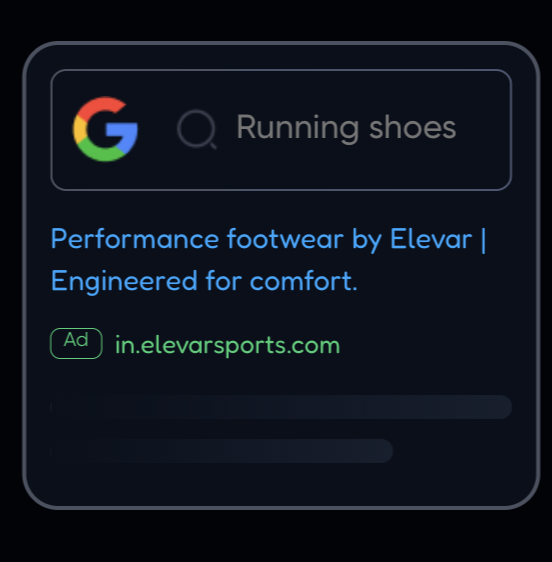

In [ ]:
cv2_imshow(image)

In [ ]:
image_path_in_colab='/content/test1.png'
extracted_info = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extracted_info)

'c) ©, Running shoes

Performance footwear by Elevar |
Engineered for comfort.

in.elevarsports.com

 



model: https://huggingface.co/ViditRaj/BERT_LATEST_Ads_Classifier?text=I+like+you.+I+love+you

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="ViditRaj/BERT_LATEST_Ads_Classifier")

config.json:   0%|          | 0.00/798 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/438M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at ViditRaj/BERT_LATEST_Ads_Classifier.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/400 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
extracted_info = 'i love my wife she is very beatiful'

In [ ]:
result = pipe(extracted_info)
res = result[0]['label']
if res == 'NON-ADVERTISEMENT':
    final_text = 0
else:
    final_text = 0.5

print(final_text)

0


In [ ]:
final_text

0.5

In [ ]:
final_image

0.37

In [ ]:
final = float(final_text)+float(final_image)
# print(final)
if final>0.7:
  print('ad')
else:
  print('non-ad')


ad


###combining all of it into one

In [ ]:
import subprocess
import os

#the yolo direc
%cd /content/yolov5

# # Define the command
# image_path = '/content/Screenshot 2024-02-03 at 6.15.17 PM.png'
# # weights_path = 'runs/train-cls/exp/weights/best.pt'
# command = f"python classify/predict.py --weights runs/train-cls/exp/weights/best.pt  --source /content/Screenshot 2024-02-03 at 6.15.17 PM.png"

image_path = '/content/test3.jpeg'
weights_path = 'runs/train-cls/exp/weights/best.pt'
command = f"python classify/predict.py --weights {weights_path} --source '{image_path}'"



result = subprocess.run(command, shell=True, capture_output=True, text=True)
final_image = float(result.stdout)
# print(final_image)


image_path_in_colab=image_path
extracted_info = pytesseract.image_to_string(Image.open(image_path_in_colab))

result = pipe(extracted_info)
res = result[0]['label']
if res == 'NON-ADVERTISEMENT':
    final_text = 0
else:
    final_text = 1

# print(final_text)
# print(final_text)

final = float(final_text)+float(final_image)
# print(final)
if final>0.7:
  print('ad')
else:
  print('non-ad')


/content/yolov5
non-ad
